Part 1: Analyzing Best-Seller Trends Across Product Categories

Objective: Understand the relationship between product categories and their best-seller status.

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv(r"C:\Users\shyam\Desktop\IRONHACK\LAB\Week 5\Day 1\amz_uk_price_prediction_dataset.csv")

In [142]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [143]:
#removing data where more than 80% of columns are null
df = df[df.columns[df.isnull().mean() < 0.8]]

In [144]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [145]:
#df["isBestSeller"].replace({True:"Yes", False:"No"}, inplace = True)

In [146]:
crosstab_category_bestseller = pd.crosstab(df['category'],df['isBestSeller'])
crosstab_category_bestseller

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [177]:
#Removing the outlier category "Sports & Outdoors"

df=df[df['category']!="Sports & Outdoors"]
df


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [148]:
#1.Crosstab Analysis:

#Create a crosstab between the product category and the isBestSeller status.
#Are there categories where being a best-seller is more prevalent?

crosstab_category_bestseller = pd.crosstab(df['category'],df['isBestSeller'])
crosstab_category_bestseller["ratio"]= crosstab_category_bestseller[True]/crosstab_category_bestseller[False]
crosstab_category_bestseller.sort_values(by='ratio', ascending=False).head(20)


#Thus there is no category where best-seller is prevalent

isBestSeller,False,True,ratio
category,,,
Grocery,9008,556,0.061723
Smart Home Security & Lighting,98,6,0.061224
Health & Personal Care,9017,552,0.061218
Mobile Phone Accessories,248,11,0.044355
Power & Hand Tools,8353,306,0.036634
"Billiard, Snooker & Pool",241,8,0.033195
Pet Supplies,9152,285,0.031141
Home Brewing & Wine Making,239,7,0.029289
Wind Instruments,243,7,0.028807


In [149]:
#2.Statistical Tests:

#Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
#Compute Cramér's V to understand the strength of association between best-seller status and category.

from scipy.stats import chi2_contingency

crosstab_category_bestseller = pd.crosstab(df['category'],df['isBestSeller'])
# Chi-square test for 'Category' and 'isBestSeller'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_category_bestseller)

chi2_statistic, chi2_p_value

(22897.513398048348, 0.0)

In [150]:
#The null hypothesis of the Chi-square test is that the two categorical variables are independent. Given the 0 ( p )-value, we reject the null hypothesis. 
# This implies that there's a significant association between Category  and isBestSeller  in the dataset.

In [151]:
from scipy.stats.contingency import association
crosstab_category_bestseller = pd.crosstab(df['category'],df['isBestSeller'])
# Computing the association between variables in 'crosstab_category_bestseller' using the "cramer" method
association(crosstab_category_bestseller, method="cramer")

0.11935320075915179

In [152]:
#The Cramér's V value of 0.119 suggests a weak association between the two variables. Though statistically significant,
#  the strength of this relationship is not very strong in practical terms.

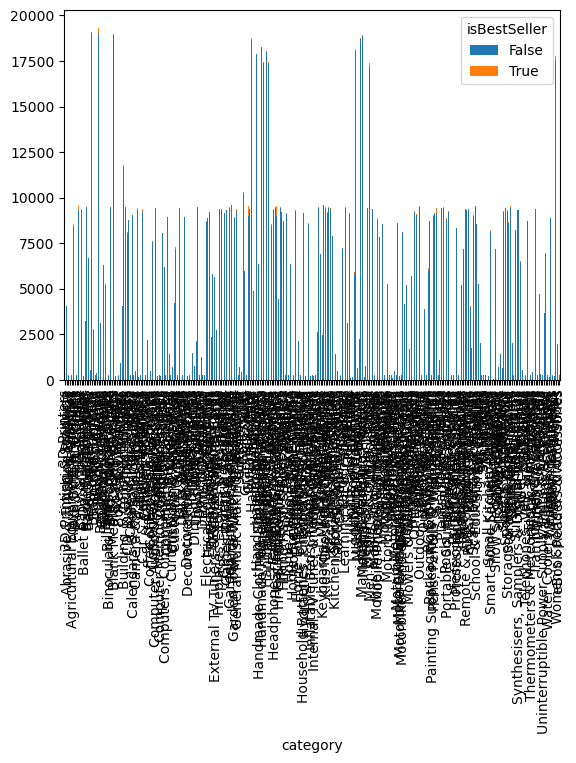

In [178]:
#3.Visualizations:

#Visualize the relationship between product categories and the best-seller status using a stacked bar chart.
# Plotting a stacked bar chart for the 'crosstab_category_bestseller' data

crosstab_category_bestseller.plot(kind="bar", stacked=True)
plt.show()

Part 2: Exploring Product Prices and Ratings Across Categories and Brands


Objective: Investigate how different product categories influence product prices.

In [154]:
#Preliminary Step: Remove outliers in product prices.

#For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 
# 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers

In [155]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [156]:

data_series = df['price']  
outliers = tukeys_test_outliers(data_series)
print(outliers)
price_list = [ i for i in outliers]
display(price_list)

10         139.00
19         164.99
23          98.95
25         149.99
28         289.00
            ...  
2443627    152.58
2443638    108.77
2443641    166.99
2443643    158.99
2443647     97.99
Name: price, Length: 215145, dtype: float64


[139.0,
 164.99,
 98.95,
 149.99,
 289.0,
 199.99,
 128.0,
 959.99,
 149.0,
 169.0,
 368.99,
 184.99,
 95.0,
 89.99,
 129.99,
 628.5,
 114.39,
 159.99,
 103.99,
 443.77,
 98.95,
 87.96,
 149.0,
 185.79,
 89.99,
 150.98,
 230.95,
 149.0,
 145.0,
 169.0,
 209.99,
 184.99,
 113.0,
 359.0,
 164.97,
 199.95,
 110.49,
 229.0,
 89.83,
 164.99,
 797.92,
 149.99,
 230.0,
 309.99,
 489.99,
 134.99,
 309.0,
 140.0,
 139.99,
 95.99,
 103.99,
 98.95,
 199.0,
 169.0,
 118.0,
 149.0,
 259.0,
 332.31,
 152.99,
 91.11,
 139.0,
 129.99,
 166.15,
 163.8,
 419.0,
 219.95,
 199.0,
 89.99,
 98.95,
 149.0,
 98.95,
 109.49,
 119.62,
 95.99,
 159.87,
 225.0,
 139.0,
 239.0,
 120.99,
 249.0,
 139.99,
 143.65,
 499.0,
 119.99,
 389.0,
 139.0,
 249.0,
 199.95,
 119.04,
 169.0,
 89.99,
 269.0,
 239.0,
 393.15,
 246.99,
 363.95,
 798.98,
 415.0,
 106.5,
 249.0,
 129.0,
 299.99,
 118.99,
 99.99,
 104.0,
 197.49,
 129.99,
 319.0,
 156.99,
 218.95,
 98.95,
 230.98,
 149.0,
 699.0,
 229.0,
 999.0,
 289.99,
 85.95,
 197

In [179]:
# Dropping the values not present in price_list

df= df[df.price.isin(price_list)==False]
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443645,2828588,B0BQMXJPP5,Helmet Ponytail Pigtails Twist Braids Hair wit...,0.0,0,19.99,False,0,Motorbike Clothing
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


Violin Plots:

Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.

Which product category tends to have the highest median price? Don't filter here by top categories.

In [180]:
df["category"].value_counts(ascending=False).head(20)

category
Beauty                                    19190
Bath & Body                               19025
Manicure & Pedicure Products              18885
Handmade Clothing, Shoes & Accessories    18710
Make-up                                   18708
Skin Care                                 18641
Hair Care                                 18581
Birthday Gifts                            18238
Handmade Gifts                            17828
Handmade Home Décor                       17566
Luggage and travel gear                   17350
Handmade Kitchen & Dining                 17326
Women                                     17317
Handmade Artwork                          17190
Handmade Home & Kitchen Products          17129
Handmade Jewellery                        16926
Fragrances                                16843
Men                                       16225
Baby                                      14834
Handmade                                  14420
Name: count, dtype: int64

In [181]:
top_category = df["category"].value_counts(ascending=False).head(20)

In [160]:
list_top_category = top_category.index

In [161]:
list_top_category

Index(['Beauty', 'Bath & Body', 'Manicure & Pedicure Products',
       'Handmade Clothing, Shoes & Accessories', 'Make-up', 'Skin Care',
       'Hair Care', 'Birthday Gifts', 'Handmade Gifts', 'Handmade Home Décor',
       'Luggage and travel gear', 'Handmade Kitchen & Dining', 'Women',
       'Handmade Artwork', 'Handmade Home & Kitchen Products',
       'Handmade Jewellery', 'Fragrances', 'Men', 'Baby', 'Handmade'],
      dtype='object', name='category')

In [164]:
df_top_category= df[df["category"].isin(list_top_category) == True]
df_top_category

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
19513,21072,B09477KHQ3,"Personalised Birthday Print Gift ""THE YEAR YOU...",4.5,763,7.99,False,900,Handmade Home & Kitchen Products
19514,21073,B0BSRFQYG8,Wax Melts 4 Bars | Build Your Own Box (Choose ...,3.9,117,6.49,True,800,Handmade Home & Kitchen Products
19515,21074,B09N9GVHV9,"Personalised Birthday Print Gift ""ON THE DAY/Y...",4.6,1155,8.99,True,600,Handmade Home & Kitchen Products
19516,21075,B0BRYGV7PQ,Fresh Wax Melts - Laundry Type Wax Melts - Str...,4.5,56,4.99,True,500,Handmade Home & Kitchen Products
19517,21076,B0B1JHB28R,Manta Makes Work Leaving Gifts | I Used to Wor...,4.7,261,9.95,True,400,Handmade Home & Kitchen Products
...,...,...,...,...,...,...,...,...,...
2383030,2746461,B0BYC3QD4C,Wall Hanging Large Macrame Tapestry Bohemian A...,0.0,0,48.99,False,0,Handmade Home & Kitchen Products
2383031,2746462,B0BYBBZ31Z,Pack of 15 White Bird's Nest Easter Egg Decor ...,0.0,0,2.69,False,0,Handmade Home & Kitchen Products
2383032,2746463,B0BYB66B3X,DIY Xtra Large Terrarium Starter Kit - Closed ...,0.0,0,33.00,False,0,Handmade Home & Kitchen Products
2383033,2746464,B0BYB5797Q,Star Wars inspired - Planet Coasters - Ideal S...,0.0,0,29.95,False,0,Handmade Home & Kitchen Products


In [182]:
df_top_category["category"].unique()

array(['Handmade Home & Kitchen Products', 'Handmade Gifts', 'Fragrances',
       'Skin Care', 'Birthday Gifts', 'Handmade Kitchen & Dining',
       'Bath & Body', 'Manicure & Pedicure Products', 'Beauty',
       'Handmade Artwork', 'Make-up', 'Baby',
       'Handmade Clothing, Shoes & Accessories', 'Handmade Home Décor',
       'Handmade', 'Men', 'Luggage and travel gear', 'Handmade Jewellery',
       'Women', 'Hair Care'], dtype=object)

C:\Users\shyam\AppData\Local\Temp\ipykernel_18924\2901962984.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_top_category, x = "category", y = "price", palette= "viridis")


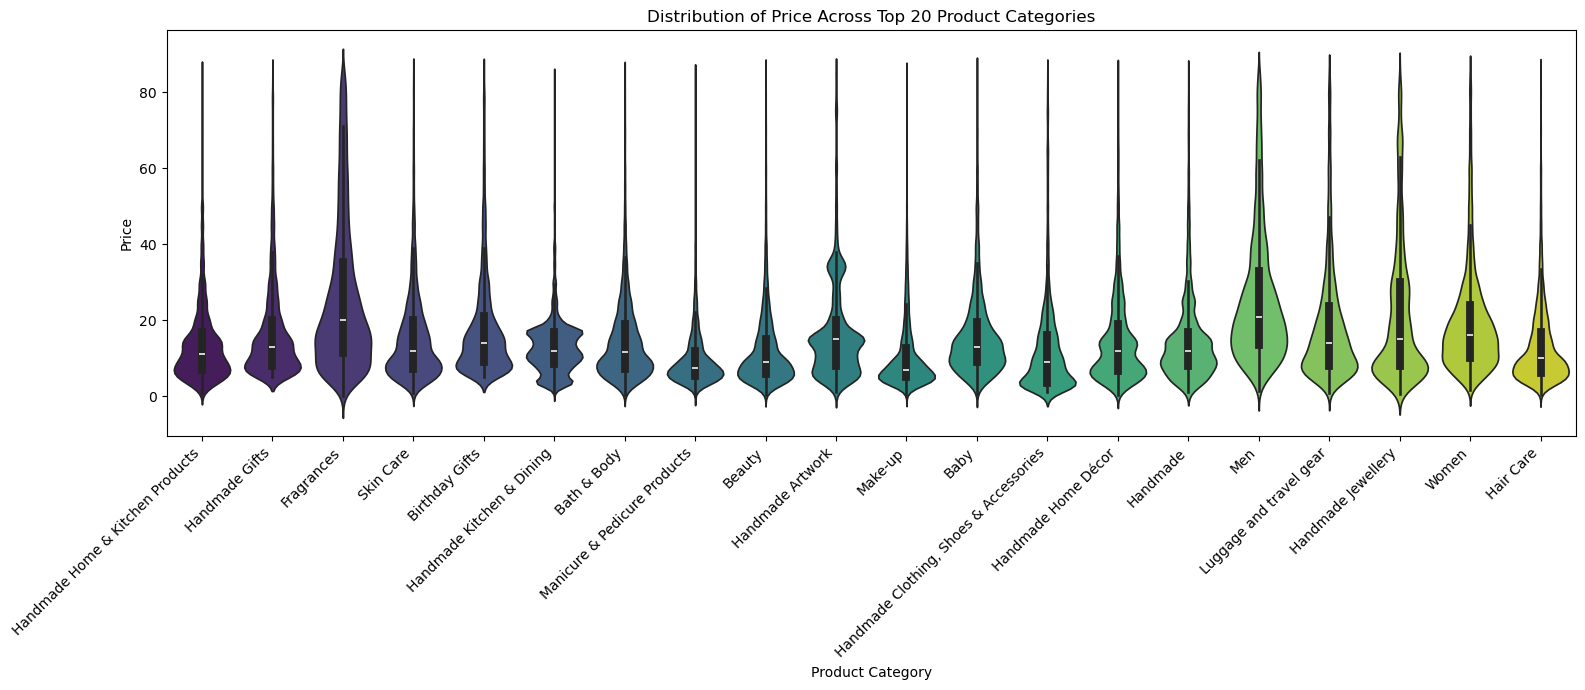

In [168]:
plt.figure(figsize=(16, 7))
sns.violinplot(data=df_top_category, x = "category", y = "price", palette= "viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.title('Distribution of Price Across Top 20 Product Categories')
plt.tight_layout()
plt.show()

In [187]:
max_median = df.groupby("category")["price"].median().sort_values(ascending=False).idxmax()
print(f"The category with maximum value of median is {max_median}.")

The category with maximum value of median is Boxing Shoes


In [ ]:
#Bar Charts:

#Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
#Which product category commands the highest average price? Don't filter here by top categories.

In [199]:
list_top_count_category = df["category"].value_counts(ascending=False).head(10).index
list_top_count_category

Index(['Beauty', 'Bath & Body', 'Manicure & Pedicure Products',
       'Handmade Clothing, Shoes & Accessories', 'Make-up', 'Skin Care',
       'Hair Care', 'Birthday Gifts', 'Handmade Gifts', 'Handmade Home Décor'],
      dtype='object', name='category')

In [200]:
df_top10_category= df[df["category"].isin(list_top_count_category) == True]
df_top10_category   

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
108173,116723,B084BTDM32,"12 Hand Made Bags of Dried Lavender, by The Ho...",4.2,878,5.75,False,1000,Handmade Gifts
108174,116724,B07L1Z4CRW,TMT® Personalised Birthstone Bracelets Gift fo...,4.7,5342,11.99,True,1000,Handmade Gifts
108175,116725,B09477KHQ3,"Personalised Birthday Print Gift ""THE YEAR YOU...",4.5,766,7.99,True,900,Handmade Gifts
108176,116726,B0B3MS7QLV,TMT® Personalised necklace with Birthstone hea...,4.6,342,12.99,True,700,Handmade Gifts
108177,116727,B09N9GVHV9,"Personalised Birthday Print Gift ""ON THE DAY/Y...",4.6,1160,8.99,True,600,Handmade Gifts
...,...,...,...,...,...,...,...,...,...
2215295,2562048,B09JYLC9QT,"Afro Hair Comb, 2 PCS Plastic Afro Pick, Anti-...",4.7,21,3.97,False,0,Hair Care
2215296,2562050,B08XR133TQ,Living Proof Scalp Care Revitalizing Treatment...,4.2,164,18.48,False,0,Hair Care
2215297,2562051,B00F7O16G6,D:FiD:fi - d:sculpt Sculpting Cream 150 g (Pac...,4.2,72,9.99,False,0,Hair Care
2215298,2562052,B0050GRIEK,Giovanni Cosmetics Frizz Be Gone Hair Serum 106g,4.5,1730,16.86,False,0,Hair Care


In [201]:
df_category_avgprice = df_top10_category.groupby("category")["price"].mean()
df_category_avgprice


category
Bath & Body                               14.577002
Beauty                                    12.342281
Birthday Gifts                            17.939121
Hair Care                                 13.271563
Handmade Clothing, Shoes & Accessories    12.530987
Handmade Gifts                            16.875788
Handmade Home Décor                       14.930502
Make-up                                   10.568703
Manicure & Pedicure Products              10.148427
Skin Care                                 15.468202
Name: price, dtype: float64

C:\Users\shyam\AppData\Local\Temp\ipykernel_18924\2064337588.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= df_top10_category  , x = "category", y= "price", palette="viridis")


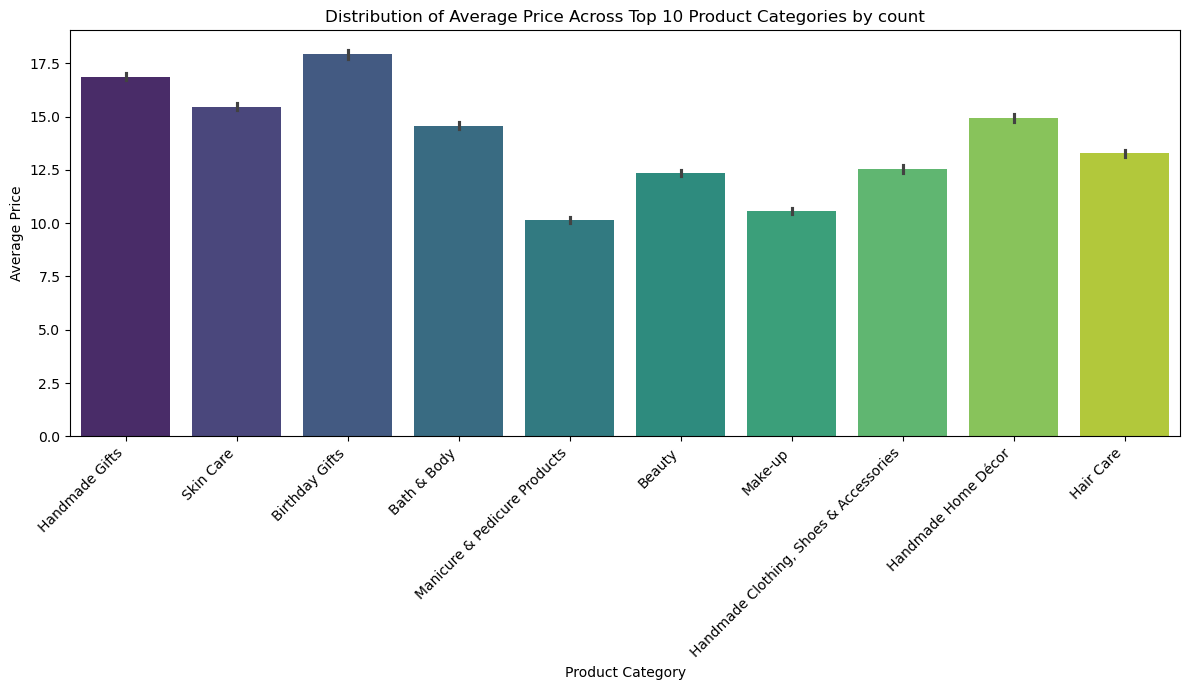

In [209]:
plt.figure(figsize=(12, 7))
sns.barplot(data= df_top10_category  , x = "category", y= "price", palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.title('Distribution of Average Price Across Top 10 Product Categories by count')
plt.tight_layout()
plt.show()

In [ ]:
#3. Box Plots:

#Visualize the distribution of product ratings based on their category using side-by-side box plots.
#  Filter out the top 10 categories based on count for better visualization.
#Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

C:\Users\shyam\AppData\Local\Temp\ipykernel_18924\142726271.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= df_top10_category, x = 'category', y = "stars", palette = "viridis")


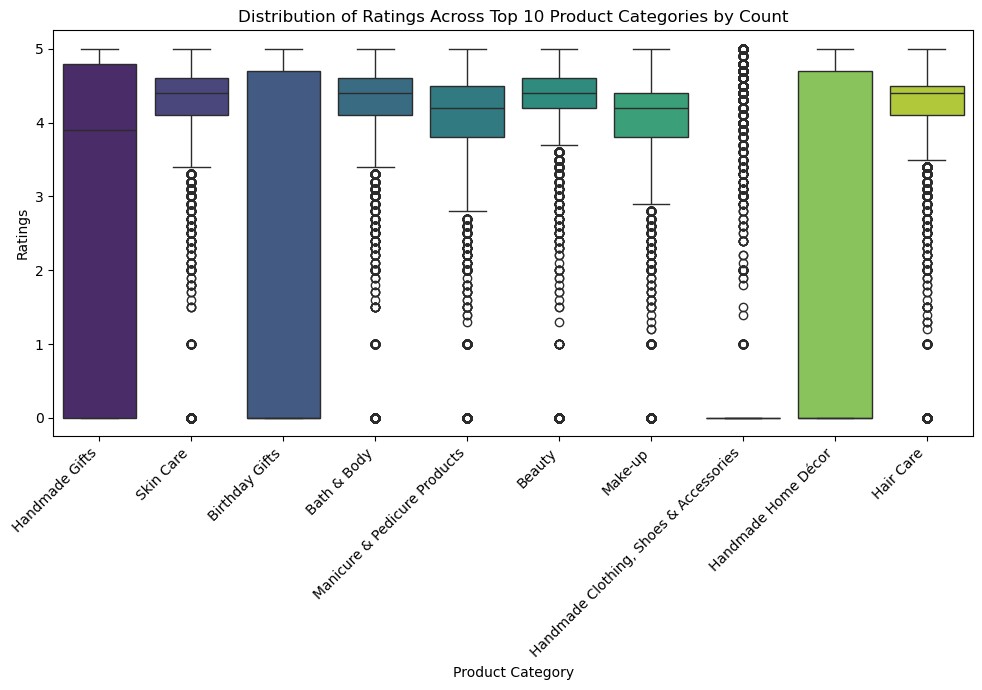

In [210]:
plt.figure(figsize=(10, 7))
sns.boxplot(data= df_top10_category, x = 'category', y = "stars", palette = "viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Product Category')
plt.ylabel('Ratings')
plt.title('Distribution of Ratings Across Top 10 Product Categories by Count')
plt.tight_layout()
plt.show()


In [215]:
max_median_rating = df.groupby("category")["stars"].median().sort_values(ascending=False).idxmax()
print(f"The category with highest median rating is {max_median_rating}.")

The category with highest median rating is Computer Memory.


Part 3: Investigating the Interplay Between Product Prices and Ratings


Objective: Analyze how product ratings (stars) correlate with product prices.

In [217]:
#Correlation Coefficients:

#Calculate the correlation coefficient between price and stars.
#Is there a significant correlation between product price and its rating?

correlation = df['price'].corr(df['stars'])
print(f"The Pearson Coefficient for price and stars is {correlation}")

correlation = df['price'].corr(df['stars'], method='spearman')
print(f"The Spearman Coefficient for price and stars is {correlation}")




The Pearson Coefficient for price and stars is -0.1416838895408483
The Spearman Coefficient for price and stars is -0.09129476540029315


In [ ]:
#The product ratings have negative correlations with price, indicating that price of the products increase, the ratings tend to decrease.

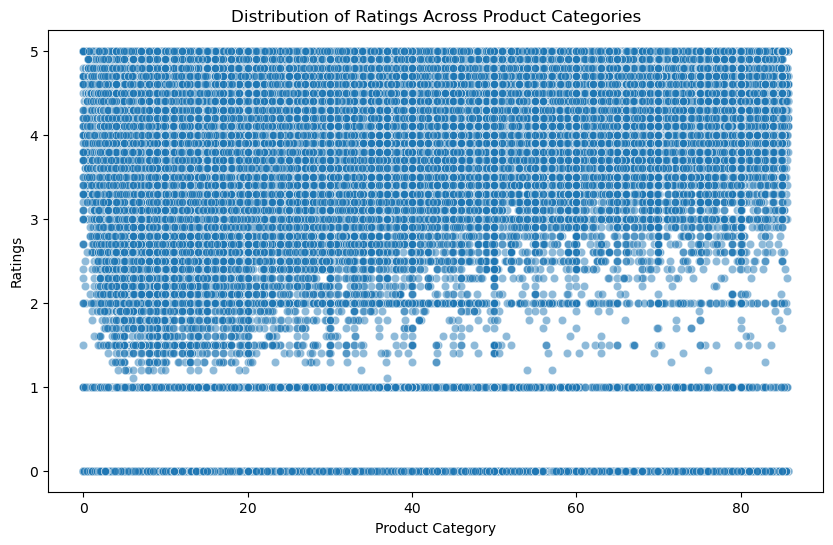

In [228]:
#Visualizations:

#Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
#Use a correlation heatmap to visualize correlations between all numerical variables.
#Examine if product prices typically follow a normal distribution using a QQ plot.


plt.figure(figsize=(10, 6))
sns.scatterplot(x= df['price'],y = df["stars"], alpha=0.5)

plt.xlabel('Product Category')
plt.ylabel('Ratings')
plt.title('Distribution of Ratings Across Product Categories')

plt.show()

In [234]:
#Use a correlation heatmap to visualize correlations between all numerical variables.
potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 20]
potential_categorical_from_numerical
df_categorical = pd.concat([df.select_dtypes("object"), potential_categorical_from_numerical], axis=1)

df_numerical = df.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)
df_numerical.drop("uid", inplace=True, axis=1)

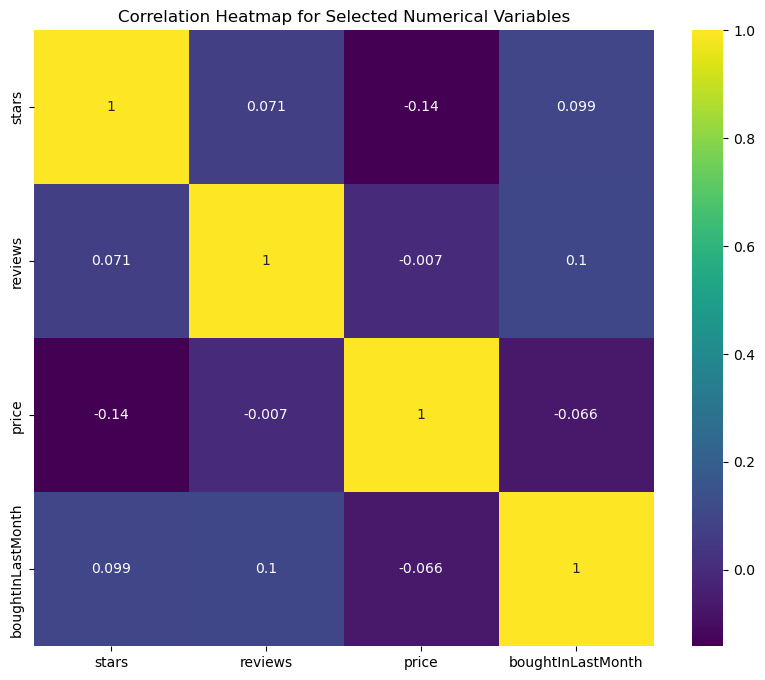

In [237]:
correlation_matrix = df_numerical.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(10, 8))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="viridis")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

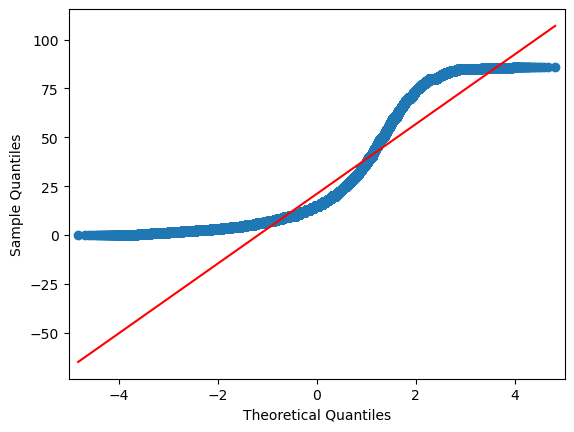

In [238]:
#Examine if product prices typically follow a normal distribution using a QQ plot.

import statsmodels.api as sm

# Generating a Q-Q plot for 'price' to check if its distribution follows a normal distribution
sm.qqplot(df['price'], line='s');